In [2]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import matplotlib as mpl
import keras.backend as K

In [3]:
def mae(y_true,y_pred):
    return np.asarray(K.mean(K.abs(y_true - y_pred))).round(3)

def mse(y_true,y_pred):
    return np.asarray(np.mean((y_true - y_pred)**2)).round(3)

In [110]:
def smooth(x,window):
    a=np.convolve(x, np.ones(window)/window, mode='valid')
    return(np.concatenate((np.zeros((window)//2),a,np.zeros((window)//2-1))))

In [170]:
dicX = {}
with np.load('/home/florian/projet/W303/seq.npz') as f:
    for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
        dicX['{}'.format(i)]=f['chr{}'.format(i)]
        
dicY = {}
with np.load('/home/florian/clipped99_MNase.npz') as f:
    for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
        dicY['{}'.format(i)]=smooth(f['chr{}'.format(i)],50)

In [394]:
df = pd.read_csv ('/home/florian/projet/models_yeast/test_new/history.csv')
dicPreds={}
with np.load('/home/florian/projet/models_yeast/preds_test_new.npz') as f:
    for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
        dicPreds['{}'.format(i)]=f[i]
        
dicCorr={}
for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
    if len(dicY[i])/10 == len(dicY[i])//10:
        dicCorr['{}'.format(i)]=round(np.corrcoef(dicY[i][::10],dicPreds[i])[0][1],3)
    else:
        dicCorr['{}'.format(i)]=round(np.corrcoef(dicY[i][1::10],dicPreds[i])[0][1],3)

dicMSE={}
for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
    if len(dicY[i])/10 == len(dicY[i])//10:
        dicMSE['{}'.format(i)]=mse(dicY[i][::10],dicPreds[i])
    else:
        dicMSE['{}'.format(i)]=mse(dicY[i][1::10],dicPreds[i])


In [397]:
for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
    print("corr" + i + ":" + str(dicCorr[i]))

corr01:0.589
corr02:0.587
corr03:0.595
corr04:0.667
corr05:0.595
corr06:0.559
corr07:0.667
corr08:0.594
corr09:0.581
corr10:0.579
corr11:0.587
corr12:0.563
corr13:0.573
corr14:0.568
corr15:0.579
corr16:0.559


In [398]:
for i in ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]:
    print("MSE " + i + ":" + str(dicMSE[i]))

MSE 01:0.015
MSE 02:0.014
MSE 03:0.014
MSE 04:0.011
MSE 05:0.013
MSE 06:0.014
MSE 07:0.011
MSE 08:0.014
MSE 09:0.015
MSE 10:0.013
MSE 11:0.013
MSE 12:0.014
MSE 13:0.013
MSE 14:0.014
MSE 15:0.013
MSE 16:0.013


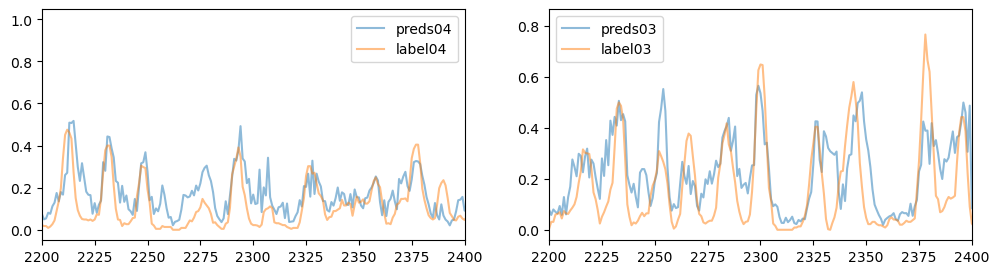

In [395]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(dicPreds['04'],alpha=0.5,label='preds04')
plt.plot(dicY['04'][::10],alpha=0.5,label='label04')
plt.xlim(2200,2400)
plt.legend()

plt.subplot(1,2,2)
plt.plot(dicPreds['03'],alpha=0.5,label='preds03')
plt.plot(dicY['03'][::10],alpha=0.5,label='label03')
plt.xlim(2200,2400)
plt.legend()

Text(0.5, 1.0, 'loss values')

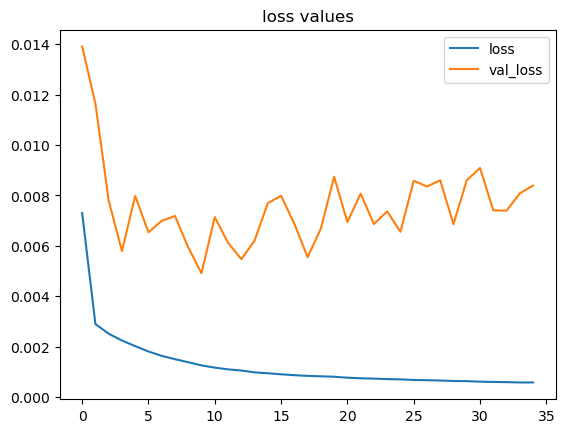

In [396]:
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

(0.001, 15)

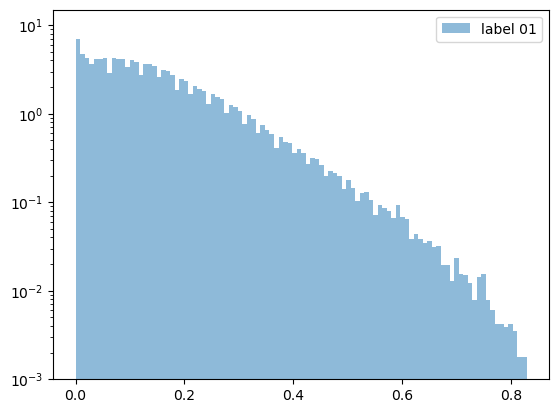

In [226]:
plt.yscale("log")
plt.hist(dicY["03"],bins=100,alpha=0.5,label="label 01",density=True)
plt.legend()
plt.ylim(0.001,15)